# Reddit Scrape
Rayden Lizan - S14

`Psaw` is installed

In [16]:
from psaw import PushshiftAPI
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
#pd.set_option('display.max_colwidth', None)

## Getting Data

Initializing a new PushshiftAPI for reddit scraping

In [2]:
api = PushshiftAPI()

Making a reddit-scrape-to-dataframe function, where you input the subreddit, start date, end date, maximum number of results and scrapetime. Function returns results in a DataFrame.

In [3]:
def redditToDT(subreddit, start, end, maxresults, scrapetime):
    results = pd.DataFrame(api.search_submissions(
                                after=start,
                                before=end,
                                subreddit=subreddit,
                                filter=['full_link','author', 'title', 'selftext', 'subreddit'],
                                limit=maxresults))
    

    results['scrapetime'] = scrapetime
    
    results['created_utc'] = pd.to_datetime(results['created_utc'], utc=True, unit='s')
    results = results.drop(columns=['d_', 'created'])
    
    
    return results

Initializing variables to input into the function.

In [4]:
start = int(dt.datetime(2022, 1, 1).timestamp())
end = int(dt.datetime(2022, 6, 1).timestamp())
subreddit = 'Minecraft'
scrapetime = dt.datetime.now()
maxresults = 300

Calling the function.

In [5]:
results = redditToDT(subreddit, start, end, maxresults, scrapetime)
results

,author,created_utc,full_link,selftext,subreddit,title,scrapetime
0,Thunderclap222333,2022-05-31 15:58:50+00:00,https://www.reddit.com/r/Minecraft/comments/v1...,,Minecraft,Day one of creating DnD Dream SMP members,2022-06-28 19:56:02.721455
1,SMH_My_Head,2022-05-31 15:58:08+00:00,https://www.reddit.com/r/Minecraft/comments/v1...,,Minecraft,me trying to place the Glazed terracotta IRL,2022-06-28 19:56:02.721455
2,rDunneWortel,2022-05-31 15:57:26+00:00,https://www.reddit.com/r/Minecraft/comments/v1...,,Minecraft,Started a new hardcore after 10 minutes I came...,2022-06-28 19:56:02.721455
3,I-am-reddit123,2022-05-31 15:56:10+00:00,https://www.reddit.com/r/Minecraft/comments/v1...,it keeps giving me the error of clear up space...,Minecraft,need help with minecraft on my Nintendo switch,2022-06-28 19:56:02.721455
4,rDunneWortel,2022-05-31 15:55:35+00:00,https://www.reddit.com/r/Minecraft/comments/v1...,I was mining down when I came across this beau...,Minecraft,Great start,2022-06-28 19:56:02.721455
...,...,...,...,...,...,...,...
295,_Cianoo,2022-05-31 03:22:58+00:00,https://www.reddit.com/r/Minecraft/comments/v1...,,Minecraft,"I made a castle modeled off of Vaders Castle, ...",2022-06-28 19:56:02.721455
296,fitboy15,2022-05-31 03:20:23+00:00,https://www.reddit.com/r/Minecraft/comments/v1...,,Minecraft,1.18.2 I obtained all music discs and mob heads,2022-06-28 19:56:02.721455
297,code_lazar420,2022-05-31 03:20:20+00:00,https://www.reddit.com/r/Minecraft/comments/v1...,,Minecraft,Paper end crystal I made for my friends birthday,2022-06-28 19:56:02.721455
298,Fede7044,2022-05-31 03:18:26+00:00,https://www.reddit.com/r/Minecraft/comments/v1...,,Minecraft,Playing with resource and behavior packs,2022-06-28 19:56:02.721455


## Preprocessing and analyzing data

Removing any post with no text

In [6]:
minecraftRedditDF = results[results['selftext'].str.len() > 0]
minecraftRedditDF

,author,created_utc,full_link,selftext,subreddit,title,scrapetime
3,I-am-reddit123,2022-05-31 15:56:10+00:00,https://www.reddit.com/r/Minecraft/comments/v1...,it keeps giving me the error of clear up space...,Minecraft,need help with minecraft on my Nintendo switch,2022-06-28 19:56:02.721455
4,rDunneWortel,2022-05-31 15:55:35+00:00,https://www.reddit.com/r/Minecraft/comments/v1...,I was mining down when I came across this beau...,Minecraft,Great start,2022-06-28 19:56:02.721455
5,z2_smartypants039,2022-05-31 15:52:42+00:00,https://www.reddit.com/r/Minecraft/comments/v1...,So what if instead of the sculk having a separ...,Minecraft,"An Idea for the sculk ""dimension""",2022-06-28 19:56:02.721455
6,LeonardoCouto,2022-05-31 15:48:27+00:00,https://www.reddit.com/r/Minecraft/comments/v1...,"So, for context, I'm starting to study Geology...",Minecraft,TIL Minecraft's ore formation... is not as wac...,2022-06-28 19:56:02.721455
9,ERNerdboi,2022-05-31 15:40:01+00:00,https://www.reddit.com/r/Minecraft/comments/v1...,Hey everyone I just got the Craftee crafting d...,Minecraft,Craftee crafting guide?,2022-06-28 19:56:02.721455
...,...,...,...,...,...,...,...
273,litillllleboy,2022-05-31 04:21:46+00:00,https://www.reddit.com/r/Minecraft/comments/v1...,[removed],Minecraft,idk if this is the right place but if you guys...,2022-06-28 19:56:02.721455
277,Siriusgames97,2022-05-31 04:10:10+00:00,https://www.reddit.com/r/Minecraft/comments/v1...,"Im underground, and my water just froze. does ...",Minecraft,Does anyone know how this happened?,2022-06-28 19:56:02.721455
280,Damightyreader,2022-05-31 03:56:19+00:00,https://www.reddit.com/r/Minecraft/comments/v1...,"Any really, I heard minecolonies and LOTR are ...",Minecraft,What are the best mods/modpacks to play solo?,2022-06-28 19:56:02.721455
282,Honeymoon_Mindset,2022-05-31 03:50:39+00:00,https://www.reddit.com/r/Minecraft/comments/v1...,[removed],Minecraft,Just be Silly!,2022-06-28 19:56:02.721455


Removing all posts with the keyword `[removed]`

In [7]:
minecraftRedditDF = minecraftRedditDF[minecraftRedditDF['selftext'] != '[removed]']
minecraftRedditDF

,author,created_utc,full_link,selftext,subreddit,title,scrapetime
3,I-am-reddit123,2022-05-31 15:56:10+00:00,https://www.reddit.com/r/Minecraft/comments/v1...,it keeps giving me the error of clear up space...,Minecraft,need help with minecraft on my Nintendo switch,2022-06-28 19:56:02.721455
4,rDunneWortel,2022-05-31 15:55:35+00:00,https://www.reddit.com/r/Minecraft/comments/v1...,I was mining down when I came across this beau...,Minecraft,Great start,2022-06-28 19:56:02.721455
5,z2_smartypants039,2022-05-31 15:52:42+00:00,https://www.reddit.com/r/Minecraft/comments/v1...,So what if instead of the sculk having a separ...,Minecraft,"An Idea for the sculk ""dimension""",2022-06-28 19:56:02.721455
6,LeonardoCouto,2022-05-31 15:48:27+00:00,https://www.reddit.com/r/Minecraft/comments/v1...,"So, for context, I'm starting to study Geology...",Minecraft,TIL Minecraft's ore formation... is not as wac...,2022-06-28 19:56:02.721455
9,ERNerdboi,2022-05-31 15:40:01+00:00,https://www.reddit.com/r/Minecraft/comments/v1...,Hey everyone I just got the Craftee crafting d...,Minecraft,Craftee crafting guide?,2022-06-28 19:56:02.721455
...,...,...,...,...,...,...,...
268,Gangsta_PlayzTTV,2022-05-31 04:31:21+00:00,https://www.reddit.com/r/Minecraft/comments/v1...,Overall theme: There will be 4 continent sized...,Minecraft,My idea of a Minecraft Civlization: Modern War...,2022-06-28 19:56:02.721455
271,houinator,2022-05-31 04:26:08+00:00,https://www.reddit.com/r/Minecraft/comments/v1...,My son downloaded a bunch of stuff from the ma...,Minecraft,Does anyone know where on your PC content from...,2022-06-28 19:56:02.721455
277,Siriusgames97,2022-05-31 04:10:10+00:00,https://www.reddit.com/r/Minecraft/comments/v1...,"Im underground, and my water just froze. does ...",Minecraft,Does anyone know how this happened?,2022-06-28 19:56:02.721455
280,Damightyreader,2022-05-31 03:56:19+00:00,https://www.reddit.com/r/Minecraft/comments/v1...,"Any really, I heard minecolonies and LOTR are ...",Minecraft,What are the best mods/modpacks to play solo?,2022-06-28 19:56:02.721455


Formatting all full text to lower case

In [8]:
minecraftRedditDF['Preprocessed post'] = minecraftRedditDF['selftext'].str.lower()
minecraftRedditDF

<ipython-input-8-7205f8d18f83>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  minecraftRedditDF['Preprocessed post'] = minecraftRedditDF['selftext'].str.lower()


,author,created_utc,full_link,selftext,subreddit,title,scrapetime,Preprocessed post
3,I-am-reddit123,2022-05-31 15:56:10+00:00,https://www.reddit.com/r/Minecraft/comments/v1...,it keeps giving me the error of clear up space...,Minecraft,need help with minecraft on my Nintendo switch,2022-06-28 19:56:02.721455,it keeps giving me the error of clear up space...
4,rDunneWortel,2022-05-31 15:55:35+00:00,https://www.reddit.com/r/Minecraft/comments/v1...,I was mining down when I came across this beau...,Minecraft,Great start,2022-06-28 19:56:02.721455,i was mining down when i came across this beau...
5,z2_smartypants039,2022-05-31 15:52:42+00:00,https://www.reddit.com/r/Minecraft/comments/v1...,So what if instead of the sculk having a separ...,Minecraft,"An Idea for the sculk ""dimension""",2022-06-28 19:56:02.721455,so what if instead of the sculk having a separ...
6,LeonardoCouto,2022-05-31 15:48:27+00:00,https://www.reddit.com/r/Minecraft/comments/v1...,"So, for context, I'm starting to study Geology...",Minecraft,TIL Minecraft's ore formation... is not as wac...,2022-06-28 19:56:02.721455,"so, for context, i'm starting to study geology..."
9,ERNerdboi,2022-05-31 15:40:01+00:00,https://www.reddit.com/r/Minecraft/comments/v1...,Hey everyone I just got the Craftee crafting d...,Minecraft,Craftee crafting guide?,2022-06-28 19:56:02.721455,hey everyone i just got the craftee crafting d...
...,...,...,...,...,...,...,...,...
268,Gangsta_PlayzTTV,2022-05-31 04:31:21+00:00,https://www.reddit.com/r/Minecraft/comments/v1...,Overall theme: There will be 4 continent sized...,Minecraft,My idea of a Minecraft Civlization: Modern War...,2022-06-28 19:56:02.721455,overall theme: there will be 4 continent sized...
271,houinator,2022-05-31 04:26:08+00:00,https://www.reddit.com/r/Minecraft/comments/v1...,My son downloaded a bunch of stuff from the ma...,Minecraft,Does anyone know where on your PC content from...,2022-06-28 19:56:02.721455,my son downloaded a bunch of stuff from the ma...
277,Siriusgames97,2022-05-31 04:10:10+00:00,https://www.reddit.com/r/Minecraft/comments/v1...,"Im underground, and my water just froze. does ...",Minecraft,Does anyone know how this happened?,2022-06-28 19:56:02.721455,"im underground, and my water just froze. does ..."
280,Damightyreader,2022-05-31 03:56:19+00:00,https://www.reddit.com/r/Minecraft/comments/v1...,"Any really, I heard minecolonies and LOTR are ...",Minecraft,What are the best mods/modpacks to play solo?,2022-06-28 19:56:02.721455,"any really, i heard minecolonies and lotr are ..."


Applying regex to remove all non-alphanumeric symbols

In [9]:
minecraftRedditDF['Preprocessed post'] = minecraftRedditDF['Preprocessed post'].str.replace('[^a-zA-Z0-9]', ' ', regex=True).str.strip()
minecraftRedditDF

<ipython-input-9-12a0d77d44f3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  minecraftRedditDF['Preprocessed post'] = minecraftRedditDF['Preprocessed post'].str.replace('[^a-zA-Z0-9]', ' ', regex=True).str.strip()


,author,created_utc,full_link,selftext,subreddit,title,scrapetime,Preprocessed post
3,I-am-reddit123,2022-05-31 15:56:10+00:00,https://www.reddit.com/r/Minecraft/comments/v1...,it keeps giving me the error of clear up space...,Minecraft,need help with minecraft on my Nintendo switch,2022-06-28 19:56:02.721455,it keeps giving me the error of clear up space...
4,rDunneWortel,2022-05-31 15:55:35+00:00,https://www.reddit.com/r/Minecraft/comments/v1...,I was mining down when I came across this beau...,Minecraft,Great start,2022-06-28 19:56:02.721455,i was mining down when i came across this beau...
5,z2_smartypants039,2022-05-31 15:52:42+00:00,https://www.reddit.com/r/Minecraft/comments/v1...,So what if instead of the sculk having a separ...,Minecraft,"An Idea for the sculk ""dimension""",2022-06-28 19:56:02.721455,so what if instead of the sculk having a separ...
6,LeonardoCouto,2022-05-31 15:48:27+00:00,https://www.reddit.com/r/Minecraft/comments/v1...,"So, for context, I'm starting to study Geology...",Minecraft,TIL Minecraft's ore formation... is not as wac...,2022-06-28 19:56:02.721455,so for context i m starting to study geology...
9,ERNerdboi,2022-05-31 15:40:01+00:00,https://www.reddit.com/r/Minecraft/comments/v1...,Hey everyone I just got the Craftee crafting d...,Minecraft,Craftee crafting guide?,2022-06-28 19:56:02.721455,hey everyone i just got the craftee crafting d...
...,...,...,...,...,...,...,...,...
268,Gangsta_PlayzTTV,2022-05-31 04:31:21+00:00,https://www.reddit.com/r/Minecraft/comments/v1...,Overall theme: There will be 4 continent sized...,Minecraft,My idea of a Minecraft Civlization: Modern War...,2022-06-28 19:56:02.721455,overall theme there will be 4 continent sized...
271,houinator,2022-05-31 04:26:08+00:00,https://www.reddit.com/r/Minecraft/comments/v1...,My son downloaded a bunch of stuff from the ma...,Minecraft,Does anyone know where on your PC content from...,2022-06-28 19:56:02.721455,my son downloaded a bunch of stuff from the ma...
277,Siriusgames97,2022-05-31 04:10:10+00:00,https://www.reddit.com/r/Minecraft/comments/v1...,"Im underground, and my water just froze. does ...",Minecraft,Does anyone know how this happened?,2022-06-28 19:56:02.721455,im underground and my water just froze does ...
280,Damightyreader,2022-05-31 03:56:19+00:00,https://www.reddit.com/r/Minecraft/comments/v1...,"Any really, I heard minecolonies and LOTR are ...",Minecraft,What are the best mods/modpacks to play solo?,2022-06-28 19:56:02.721455,any really i heard minecolonies and lotr are ...


Saving results into json format

In [10]:
minecraftRedditDF.to_json('minecraftReddit.json')

## Show the scraped data's frequency

In [31]:
text = " ".join(i for i in minecraftRedditDF['Preprocessed post'])
stopwords = set(STOPWORDS)
wordcloud = WordCloud().generate(text)
list(wordcloud.words_)

['s',
 'minecraft',
 'server',
 'world',
 'know',
 'want',
 'm',
 'help',
 'one',
 'new',
 'sculk',
 't',
 'game',
 'island',
 'friend',
 'amp x200b',
 'https preview',
 'preview redd',
 'width amp',
 'amp format',
 'amp auto',
 'auto webp',
 'webp amp',
 'amp s',
 'well',
 'make',
 'don t',
 'png width',
 'format png',
 'png amp',
 'now',
 'anyone',
 'good',
 'block',
 'still',
 'use',
 'build',
 'time',
 'work',
 'villager',
 'end',
 've',
 'way',
 'run',
 'will',
 'farm',
 'load',
 'go',
 'found',
 'need',
 'play',
 'mod',
 'please',
 'doesn t',
 'spawn',
 'structures',
 'built',
 'starting',
 'give',
 'gold',
 'really',
 'mean',
 'stuff',
 'first',
 'warden',
 'im',
 'item',
 'look',
 'x200b https',
 'try',
 'right',
 'called',
 'y',
 'got',
 'thing',
 'thank',
 'people',
 'lot',
 'survival',
 'keep',
 'animal',
 'screen',
 'set',
 'drop',
 'instead',
 'small',
 'version',
 'used',
 'light',
 'something',
 'much',
 'made',
 'marketplace',
 'problem',
 'issue',
 'trying',
 'back',
 

In [38]:
stopwords = ['s','m','t','amp x200b','https preview', 'preview redd','width amp','amp format','amp auto','auto webp','webp amp','amp s', 'png width','format png','png amp']+list(stopwords)
wordcloud = WordCloud(stopwords=stopwords).generate(text)
wordcloud.words_

{'minecraft': 1.0,
 'server': 0.92,
 'world': 0.84,
 'know': 0.76,
 'want': 0.76,
 'help': 0.68,
 'one': 0.64,
 'new': 0.6,
 'sculk': 0.6,
 'game': 0.6,
 'island': 0.52,
 'friend': 0.52,
 'amp x200b': 0.52,
 'https preview': 0.52,
 'preview redd': 0.52,
 'width amp': 0.52,
 'amp format': 0.52,
 'amp auto': 0.52,
 'auto webp': 0.52,
 'webp amp': 0.52,
 'well': 0.48,
 'don': 0.48,
 'make': 0.48,
 'png width': 0.48,
 'format png': 0.48,
 'png amp': 0.48,
 'now': 0.44,
 'anyone': 0.44,
 'good': 0.44,
 'block': 0.44,
 'still': 0.4,
 'use': 0.4,
 'build': 0.4,
 'time': 0.4,
 'work': 0.4,
 'villager': 0.4,
 'end': 0.36,
 've': 0.36,
 'way': 0.36,
 'run': 0.36,
 'will': 0.36,
 'farm': 0.36,
 'load': 0.32,
 'go': 0.32,
 'doesn': 0.32,
 'found': 0.32,
 'need': 0.32,
 'play': 0.32,
 'mod': 0.32,
 'please': 0.32,
 'spawn': 0.28,
 'structures': 0.28,
 'built': 0.28,
 'starting': 0.28,
 'give': 0.28,
 'gold': 0.28,
 'really': 0.28,
 'mean': 0.28,
 'stuff': 0.28,
 'first': 0.28,
 'warden': 0.28,
 'im

In [21]:
frequencywords = pd.DataFrame(' '.join(minecraftRedditDF['Preprocessed post']).split()).value_counts()[:10]
frequencywords

the    204
i      197
to     161
it     143
a      141
and    140
of      76
is      65
for     59
on      58
dtype: int64

## The most popular word is `the` followed by `i`

<AxesSubplot:xlabel='0'>

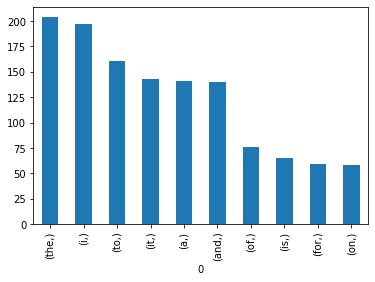

In [22]:
frequencywords.plot.bar()